# CHRC race data from 2017 season

This notebook uses NYRR race data for Crown Heights Running Club to examine team performance across the 2017 season.  The notebook is currently set up to answer the question 'how fast is your club?', but the dataframe is left intentionally broad for additional analysis in the future. 

In [1]:
import glob
import pandas as pd
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import numpy as np
import os

The `pace_factors` dictionary stores race distances and conversion factors to a 10K pace.

In [2]:
pace_factors = {'1m': [1, 6.93], '5k': [3.1, 2.09], '4m': [4, 1.60], '8k': [4.97, 1.27], '5m': [5, 1.26],
                '10k': [6.2, 1.00], '12k': [7.46, 0.82], '15k': [9.32, 0.65], '10m': [10, 0.60], '20k': [12.43, 0.48],
                'half':[ 13.1, 0.45], '25k': [15.53, 0.38], '30k': [18.64, 0.31], '20m': [20, 0.29], 
                'full': [26.2, 0.22]}

`pace_conv` takes the 'XX:XX' format pace in the NYRR file and converts it to a float value.
`adj_pace` then adjusts the pace value to the corresponding 10k pace.

In [3]:
def pace_conv(item):
    conv_pace = item.split(':')
    try:
        item = float(conv_pace[0]) + (float(conv_pace[1])/60)
    except:
        item = 0.0
    return item

In [4]:
def adj_pace(item):
    item = (item * pace_factors[race_dist][0] * pace_factors[race_dist][1]) / 6.2
    return item

This portion reads all the csv files in my Running folder and adds their information to my dataframe, as the season progressed, I was able to add each new race csv without having to update the code. 

In [5]:
df = pd.DataFrame()

race_dir = '/Users/ellykuhlman/Desktop/Running'

for read_file in os.listdir(race_dir):
    filepath = os.path.join(race_dir, read_file)
    if read_file.endswith('.csv'):
        race_id = read_file.rstrip('.csv')
        race_dist = race_id.split('_')[-1] 
        race_dist_num = pace_factors[race_dist][0]
        contents = pd.read_csv(filepath, skiprows=4, converters={'Pace':pace_conv})
        contents = contents.drop(contents.index[len(contents) - 1])
        contents['Adjusted Pace'] = adj_pace(contents['Pace'])
        contents['Race Name'] = race_id
        contents['Distance'] = race_dist_num
        df = df.append(contents)
    else:
        continue

cleans dataframe and adds 'Full Name' column to more accurately identify individual runners

In [6]:
df['Full Name'] = df['First Name'].map(str) + ' ' + df['Last Name'].map(str)
df = df.dropna(axis=1, how='all')

This first graph compares the spread of team paces across races. For the sake of comparison, I'm using the converted 10k pace for each race.

In [7]:
df.boxplot(column='Adjusted Pace', by='Race Name', figsize=(20,10), grid=False)

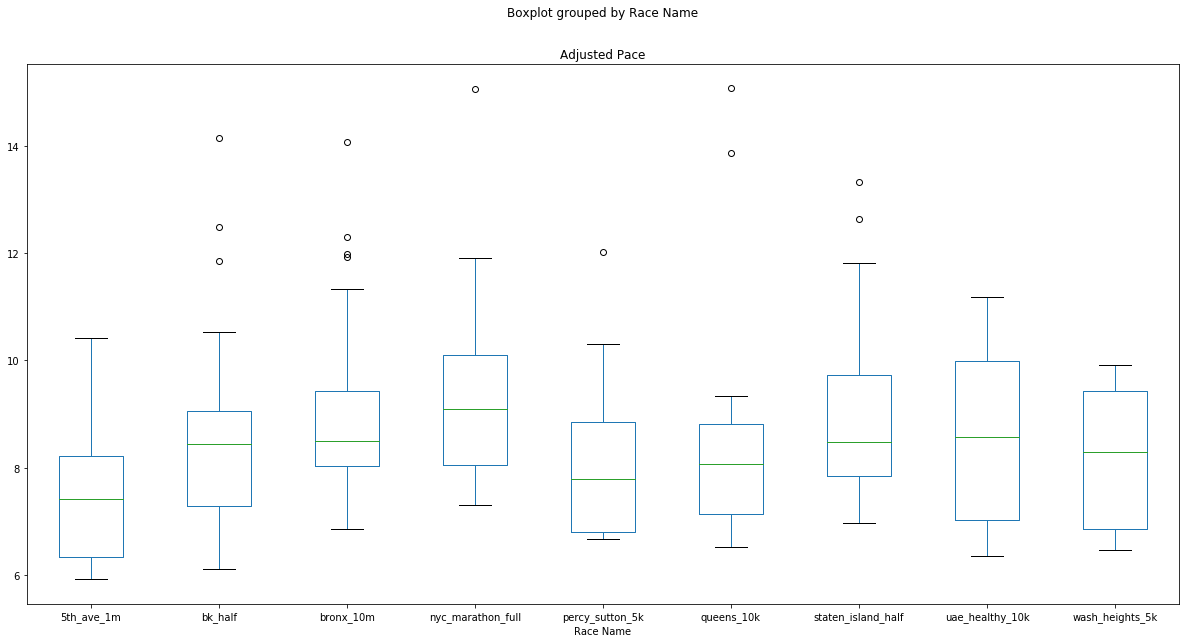

In [8]:
plt.show()

The following commands compare the spread of actual paces by distances raced.

In [9]:
df.boxplot(column='Pace', by='Distance', figsize=(20,10), grid=False)

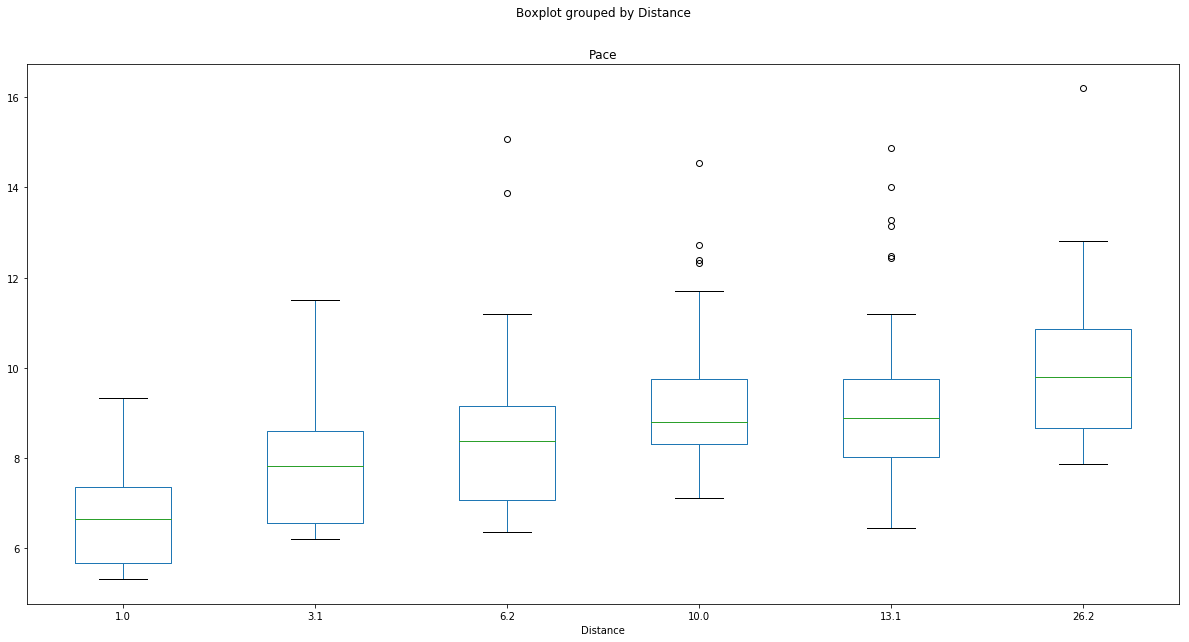

In [10]:
plt.show()

The following code displays the spread race paces across the club. The season average pace for each runner is used.

In [11]:
runners = df.groupby('Full Name')

In [12]:
runners_avg_pace = runners['Pace'].mean()

In [13]:
fig, ax = plt.subplots()
N, bins, patches = ax.hist(runners_avg_pace, 12)

In [14]:
fracs = bins.astype(float)/bins.max()
norm = colors.Normalize(fracs.min(), fracs.max())

for thisfrac, thispatch in zip(fracs, patches):
    color = cm.BuPu(norm(thisfrac))
    thispatch.set_facecolor(color)
    thispatch.set_edgecolor('k')

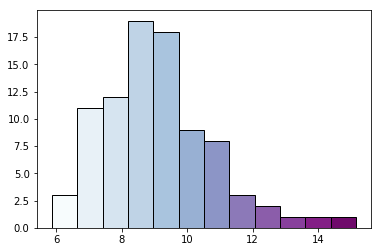

In [15]:
plt.show()

The data can also be used to look at an individual runner - here it pulls my paces, by distance, across the 2017 season.

In [16]:
my_data = df.where(df['Full Name'] == 'Elly Kuhlman')
my_data = my_data.dropna(axis=0, how='all')

In [17]:
my_data

,Overall Place,Gender Place,Age-Group Place,Bib,First Name,Last Name,Gender/Age,IAAF,Overall Time,Pace,Age-Graded Time,Age-Graded Place,Age- Graded Percent,Adjusted Pace,Race Name,Distance,Full Name
14,4255.0,867.0,335.0,10943.0,Elly,Kuhlman,F28,USA,1:43:10,7.883333,1:43:10,1227.0,63.21%,7.495524,bk_half,13.1,Elly Kuhlman
6,2005.0,319.0,101.0,3793.0,Elly,Kuhlman,F28,USA,1:18:51,7.900000,1:18:51,535.0,62.60%,7.645161,bronx_10m,10.0,Elly Kuhlman
10,10679.0,2282.0,498.0,17543.0,Elly,Kuhlman,F28,USA,3:52:07,8.866667,3:52:07,4049.0,58.34%,8.243140,nyc_marathon_full,26.2,Elly Kuhlman
3,1376.0,201.0,63.0,6701.0,Elly,Kuhlman,F28,USA,1:45:02,8.016667,1:45:02,329.0,62.08%,7.622298,staten_island_half,13.1,Elly Kuhlman


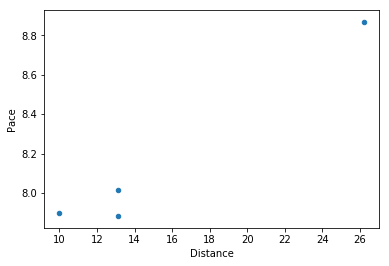

In [18]:
my_data.plot(x='Distance', y='Pace', kind='scatter')
plt.show()